# <center>INTRODUCTION TO ARTIFICIAL INTELLIGENCE</center>
# <center>Second assignment</center>

Welcome to the second and final assignment of the Introduction to Artificial Intelligence course! The assignment is divided into three parts. Complete all three parts and upload the completed notebook on Moodle by the 15th of October (midnight). Good luck!

# PART 1: SEARCH AND HEURISTICS

This notebook provides a maze solver program implementing the A* algorithm. It can read a maze from a text file, solve it, and display the solution. The heuristics function used is the Manhattan distance, and each step is associated to a cost of 1. You will have to fill in the missing parts of the algorithm and find the solution to this maze:

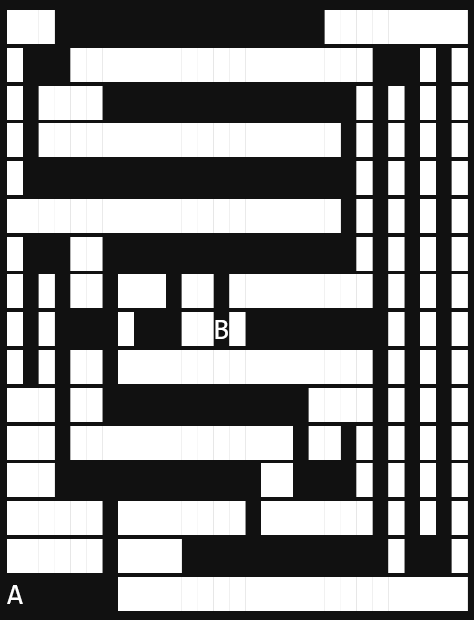

Where A is the initial state and B is the goal state.

## BEFORE YOU START:

The A* algorithm is a popular pathfinding algorithm used in games and robotics. Before starting the exercise, answer the following questions:

What is a frontier in search algorithms? How is the frontier arranged in the A* search algorithm?

--- INSERT YOUR ANSER HERE ---

An integral part of the A* algorithm is the f value, associated to each state. Describe briefly how it is defined.

--- INSERT YOUR ANSWER HERE ---

Three helper functions have already been implemented for you. The functions load_maze and print_maze handle the loading and visualization of the maze, while neighbors_of_state returns all possible moves for a given state in the maze.

In [ ]:
from maze import load_maze, print_maze, neighbors_of_state

We will be implementing a node data structure to keep track of the current node and be able to backtrack reconstructing the full solution once a goal node is found. We will initialize the node as a dictionary containing state "state", parent of the state "parent", and action "action" to get to the state.

In [ ]:
#The cost will be added to the node while solving the maze
def create_node(state, parent, action):
    return ...


Define the functions you will need to manage elements of the frontier.

In [ ]:
def manhattan_distance(point1, point2):
    """Compute the Manhattan distance between two points."""
    return abs(___ - ___) + abs(___ - ___)

def add_to_queue(frontier, node, goal):
    """
    Add the node to the frontier based on the A* algorithm.
    The node is inserted in the correct position based on its f value to ensure
    the frontier remains sorted.
    """
    # Compute the cost (g(n)) - which is the cost from the start to this node.
    # For simplicity, we assume the cost to move from one node to any of its neighbors is 1.

    g_n = node[___] if "cost" in node else 0

    # Compute the heuristic (h(n)) - which is the estimated cost from this node to the goal.
    h_n = ...

    # Total cost
    f_n = ...
    node["f_n"] = f_n

    # Insert node into the frontier in the correct position based on its total f value.
    inserted = False
    for i, existing_node in enumerate(___):
        if existing_node["f_n"] > ___:
            frontier.insert(i, ___)
            inserted = True
            break
    if not inserted:
        frontier.append(node)

def contains_state_in_queue(frontier, state):
    """Check if a state exists in the frontier."""
    return any(node["state"] == ___ for ___ in ___)

def is_queue_empty(frontier):
    """Check if the frontier is empty."""
    return ...

def remove_from_queue(frontier):
    """Remove and return the node with the lowest total f value from the frontier."""
    if is_queue_empty(___):
        raise Exception("empty frontier")
    else:
        return ...

Define the function to solve the maze. You will have to implement the functions you have previously defined

In [ ]:
def solve_maze(walls, start, goal):
    num_explored = 0

    # Initialize the starting node with a cost of 0
    start_node = ___(state=start, parent=None, action=None)
    start_node["cost"] = 0

    # Initialize frontier
    frontier = []
    ___(frontier, start_node, goal)

    #Initialize the empty explored node set
    explored = ...

    while True:
        # Check if the frontier is empty
        if ___(frontier):
            raise Exception("no solution")

        # Get the next node from the frontier
        node = ___(frontier)
        num_explored += 1

        # Check if the current node is the goal
        if node["state"] == ___:
            actions = []
            cells = []
            #Reconstruct the solution, backtrack through the states...
            #How do you check, if a node is the last remaining node? What does the very
            #first node of the search process miss?
            while ... is not None:
                actions.append(node["action"])
                cells.append(node["state"])
                node = node["parent"]
            ___.reverse()
            ___.reverse()
            return actions, cells, num_explored

        # Mark the current node as explored
        ___.add(node["state"])

        # Add neighbors to the frontier
        for action, state in ___(walls, ___):
            #Check that the state is not already in the frontier, and in the explored set
            if not ___(frontier, state) and state not in ___:
                child = ___(state=state, parent=node, action=action)

                # Set the cost for the child node (cost of current node + 1, assuming each step has a cost of 1)
                child["cost"] = node["cost"] + 1

                #Add to new node to the frontier
                ___(frontier, child, goal)

And now, check if you can solve the maze!

In [ ]:
filename = input("Enter the maze filename (e.g., maze.txt): ")
walls, start, goal = load_maze(filename)
print("Maze:")
print_maze(walls, start, goal)
print("Solving...")
actions, cells, num_explored = solve_maze(walls, start, goal)
print("States Explored:", num_explored)
print("Solution:")
print_maze(walls, start, goal, solution_path=cells)

# PART 2: LOGIC PUZZLE: KNIGHTS AND KNAVES

In 1978, Raymond Smullyan introduced a book filled with logical puzzles, among which the "Knights and Knaves" category. In these puzzles, characters are either knights or lying knaves: knights always tell the truth, while knaves always lie. The goal is to identify each character's type based on their statements. For instance, if a character claims to be both a knight and a knave, they must be a knave, as they can't be both. The challenge is to frame these puzzles in propositional logic and run them through an AI model-checking algorithm. More information about the logic of the assignment can be found at the link:
https://cs50.harvard.edu/summer/ai/2020/projects/1/knights/.

Take a look at the logic.py file:

In [ ]:
from logic import *

Notice that this file defines several classes for different types of logical connectives. These classes can be composed within each other, so an expression like And(Not(A), Or(B, C)) represents the logical sentence stating that symbol A is not true, and that symbol B or symbol C is true (where “or” here refers to inclusive, not exclusive, or).

The file also contains a function model_check. model_check takes a knowledge base and a query. The knowledge base is a single logical sentence: if multiple logical sentences are known, they can be joined together in an And expression.

## BEFORE YOU START

Answer the following questions

How does the model checking algorithm work? When does it return 'True' for a specific query?

---INSERT YOUR ANSWER HERE---

Consider the following fact: If A is a knight, and A makes statement S, statement S must be true. On the other hand, if statement S is true, then A must be a knight, because knights always tell the truth, and knaves always lie. We can therefore summarize this relationship as:
 <center>A is a knight ---> Statement S is true</center>

<center>and</center>

<center>Statement S is true ---> A is a knight</center>

How do you define this type of relationship in logic? What connective do you use?

---INSERT YOUR ANSWER HERE---

Let's start by defining the propositional symbols.

In [ ]:
AKnight = ___("A is a Knight")
AKnave = ___("A is a Knave")

BKnight = ___("B is a Knight")
BKnave = ___("B is a Knave")

CKnight = ___("C is a Knight")
CKnave = ___("C is a Knave")

- Now, you will have to implement four different knowledge bases, knowledge0, knowledge1, knowledge2, and knowledge3, which will contain the knowledge needed to deduce the solutions to the upcoming Puzzles 0, 1, 2, and 3, respectively.
- For each knowledge base, you’ll likely want to encode two different types of information: (1) information about the structure of the problem itself (i.e., information given in the definition of a Knight and Knave puzzle), and (2) information about what the characters actually said.
- Consider what it means if a sentence is spoken by a character. Under what conditions is that sentence true? Under what conditions is that sentence false? How can you express that as a logical sentence?

The first puzzle has been partially implemented for you, as an example

### Puzzle 0
A says "I am both a knight and a knave."

In [ ]:
# Puzzle 0
knowledge0 = And(
    # A is either a knight or a knave
    Or(AKnave, AKnight),
    Not(And(AKnave, AKnight)),

    # A says "I am both a knight and a knave."
    # What logical connetive would you use?
    ___(AKnight, And(AKnight, AKnave))
)

### Puzzle 1
A says "We are both knaves." (Must be Knave ... A and B cannot both be knaves or knights)
B says nothing. (Must be Knight)

In [ ]:
# Puzzle 1
knowledge1 = And(
    # A and B are either knights or knaves
    # A says "We are both knaves." (Must be Knave)
    # B says nothing. (Must be Knight)
)

### Puzzle 2
A says "We are the same kind."
B says "We are of different kinds."

In [ ]:
# Puzzle 2
knowledge2 = And(
    # A and B are either knights or knaves
    # A says "We are the same kind."
    # B says "We are of different kinds."

)

### Puzzle 3
A says either "I am a knight." or "I am a knave.", but you don't know which.
B says "A said 'I am a knave'."
B says "C is a knave."
C says "A is a knight."

In [ ]:
# Puzzle 3
knowledge3 = And(
    # A, B, C are either knights or knaves
    # A says either "I am a knight." or "I am a knave.", but you don't know which.
    # B says "A said 'I am a knave'."
    # B says "C is a knave."
    # C says "A is a knight."

)

## Check the model

Now, if you implemented the knowledge bases correctly, you should be able to check the model and find out who is the knight and who is the knave!

In [ ]:
symbols = [AKnight, AKnave, BKnight, BKnave, CKnight, CKnave]
puzzles = [
    ("Puzzle 0", knowledge0),
    ("Puzzle 1", knowledge1),
    ("Puzzle 2", knowledge2),
    ("Puzzle 3", knowledge3)
]
for puzzle, knowledge in puzzles:
    print(puzzle)
    if len(knowledge.conjuncts) == 0:
        print("    Not yet implemented.")
    else:
        for symbol in symbols:
            if ___(___, symbol):
                print(f"    {symbol}")


# PART 3: PROBABILISTIC INFERENCE

In [ ]:
! pip install pgmpy

# INFERENCE IN A PROBABILISTIC SETTING

Consider the following scenario:
Harry has installed a new burglar alarm at his home to detect break-ins. While the alarm is reliable in detecting burglaries, it can also be triggered by minor earthquakes. Harry's two neighbors, David and Sophia, have promised to notify Harry at work if they hear the alarm. David consistently calls Harry whenever the alarm sounds, but he occasionally mistakes a ringing phone for the alarm and calls during those times as well. Conversely, Sophia often listens to loud music, which means she might not always hear the alarm when it goes off.

The scenario can be represented as the Bayes Network shown below. In the following exercise, we will exploit the library pgmpy to model this network in Python and use it for inference.

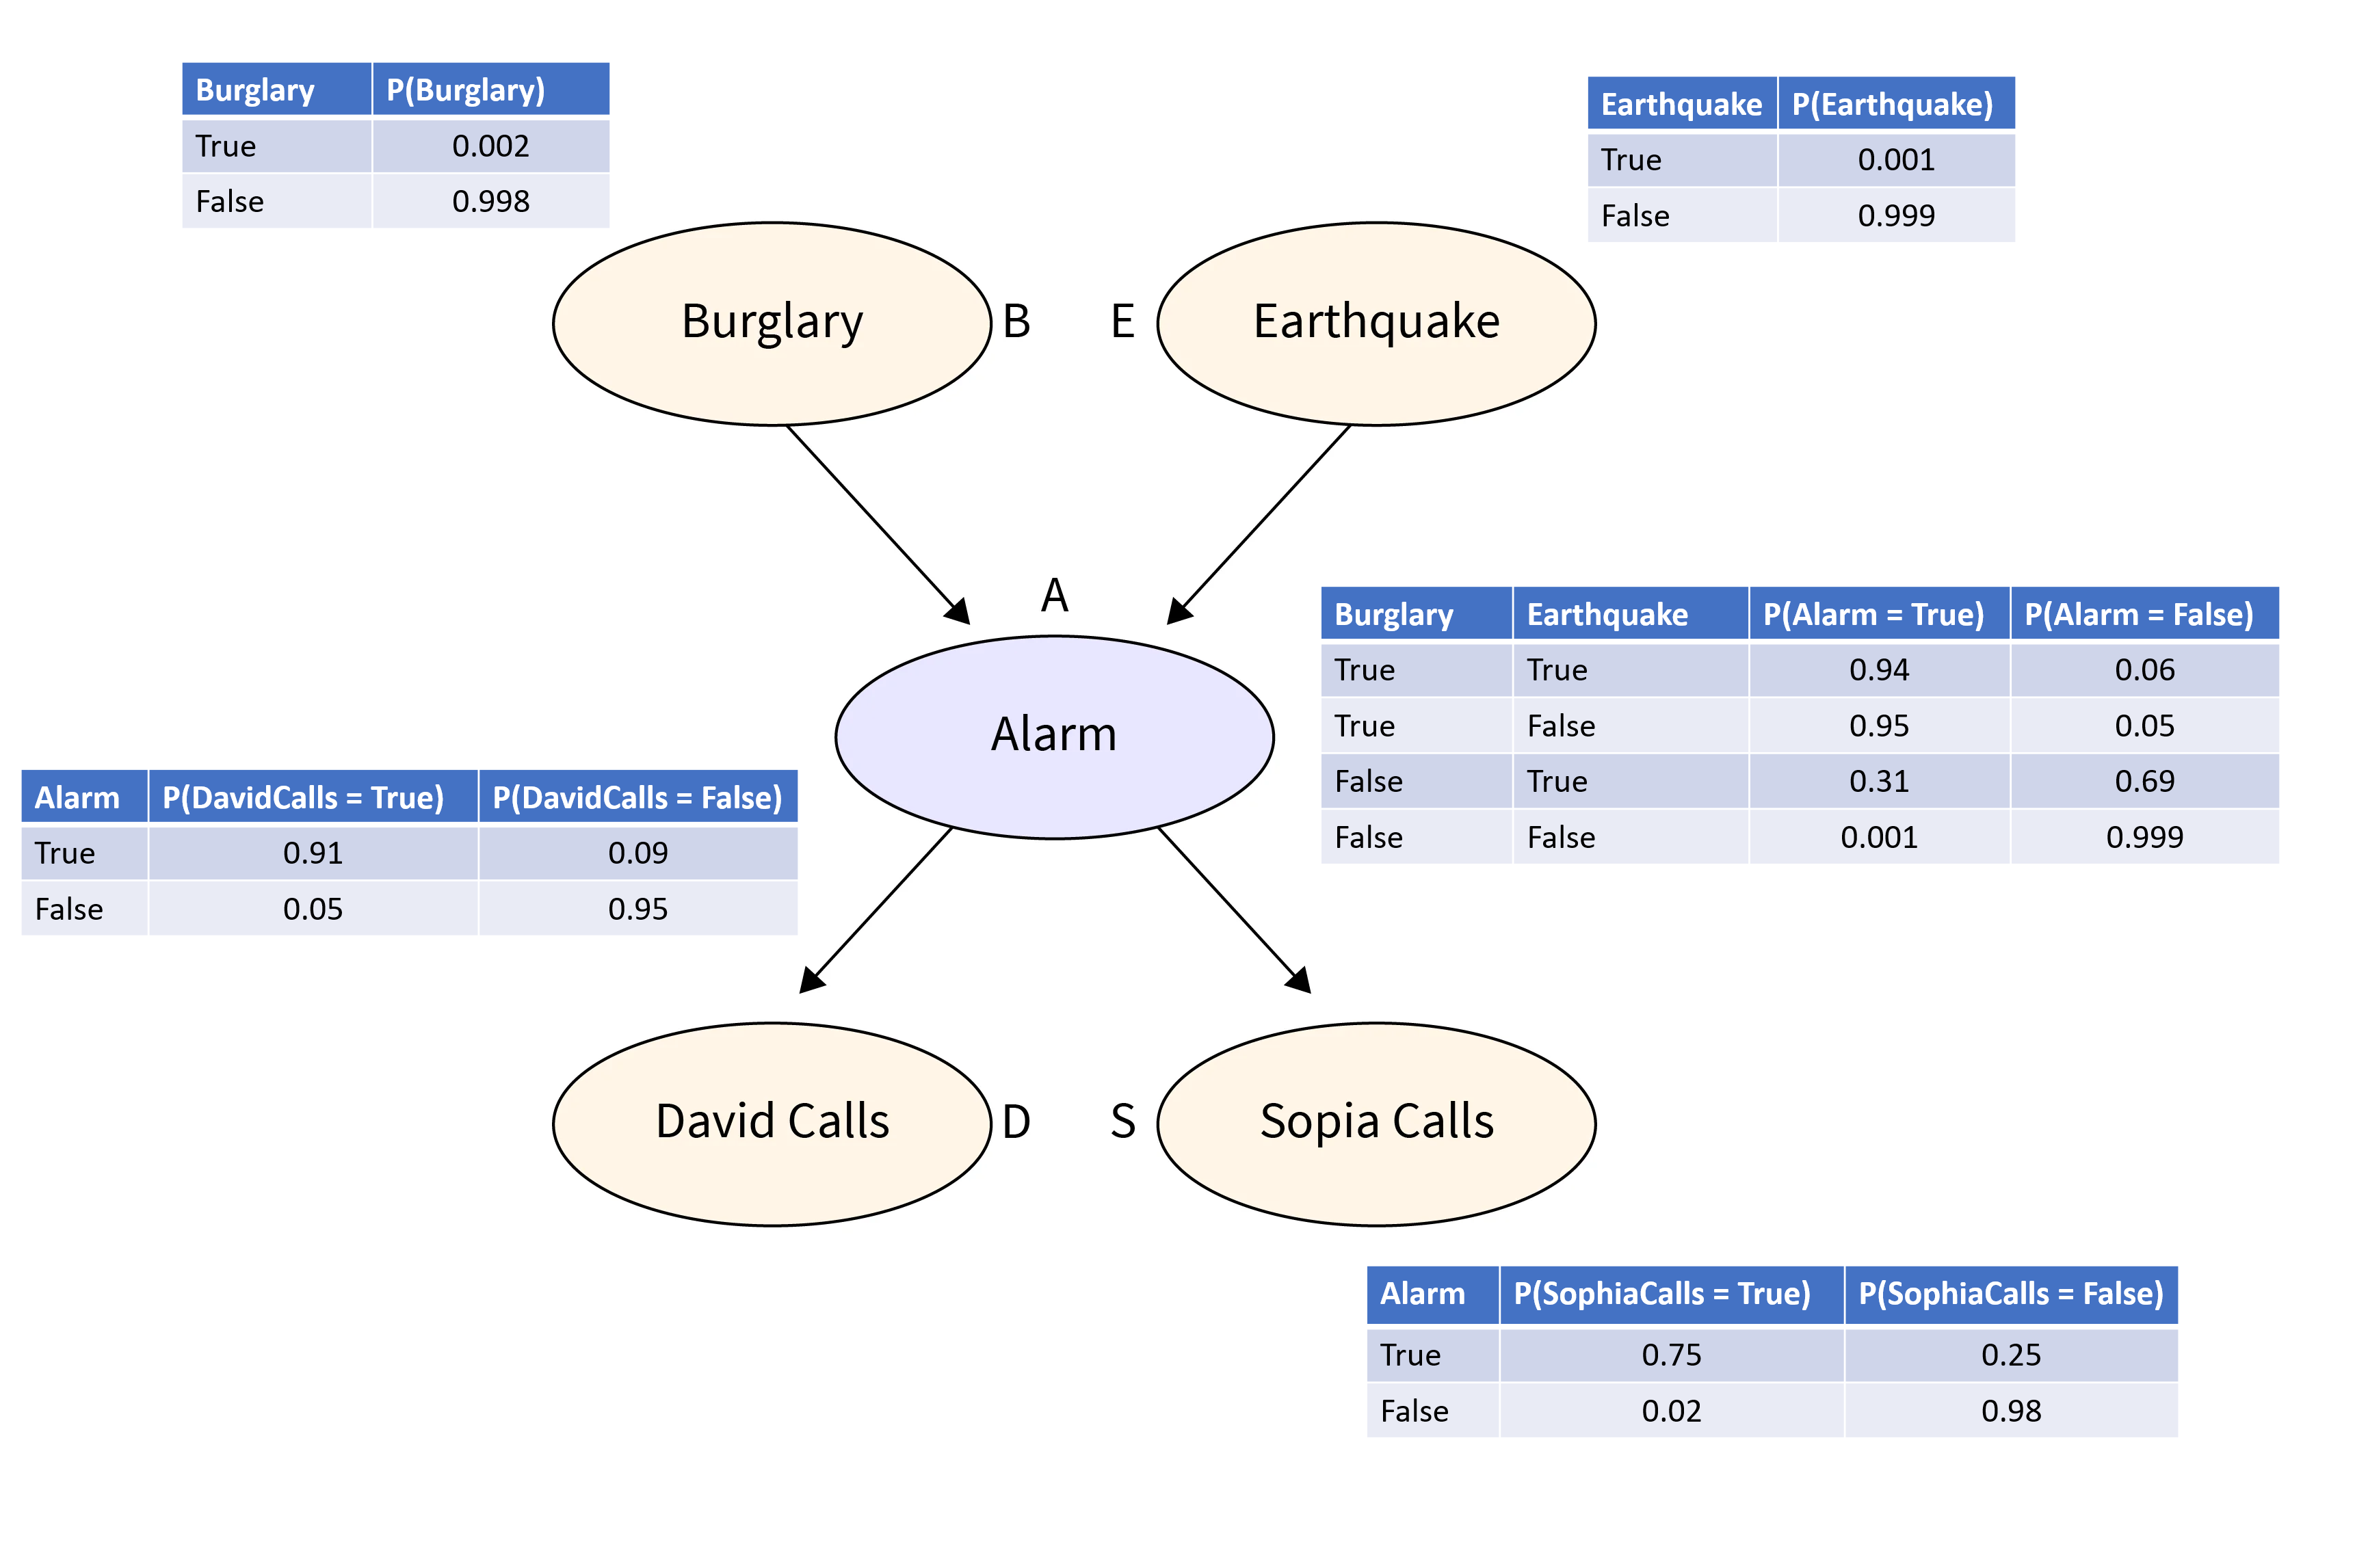

Your task is to create the network and determine the likelihood that the alarm went off without any actual burglary or earthquake, yet both David and Sophia still called Harry.
Let's import first the relevant modules from pgmpy and create the structure of the Newtork.

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

### BEFORE YOU START

Answer the following questions:

What variables are present in this BN? What is their domain?

--- INSERT YOUR ANSWER HERE ---

Please list all dependencies and conditional independencies in the network.

--- INSERT YOUR ANSWER HERE ---

Now, let's start by definiting the structure of the network. Hint: check out the pgmpy documentation: https://pgmpy.org/models/bayesiannetwork.html

In [ ]:
# Define the structure
model = BayesianNetwork(...
                       )


Now, define the conditional probability tables.

In [ ]:
# Burglary and Earthquake nodes have no parents
cpd_burglary = ...
cpd_earthquake = ...


# Alarm node is conditional on Burglary and Earthquake
cpd_alarm = ...


# DavidCalls and SophiaCalls nodes are conditional on Alarm
cpd_david_calls = ...
cpd_sophia_calls = ...


# Associating the CPDs with the network
model.add_cpds(___, ___, ___, ___, ___)

# Check model consistency
assert model.check_model()


Now in order to calculate the answer to the QUERY, you will have to calculate three conditional probabilities. Which probabilities are they? Remember to insert the right evidence for each conditional probability.
How do you compose these conditional probabilities into the final probability?

In [ ]:
# Initialize the VariableElimination class
infer = VariableElimination(___)

# Step 1:
prob_alarm = infer.query(variables= ..., evidence= ...).values[0]

# Step 2:
prob_david_calls = infer.query(variables = ..., evidence= ...).values[0]

# Step 3:
prob_sophia_calls = infer.query(variables = ..., evidence= ...).values[0]

# Compose the results of the three queries
final_probability = ...
print(final_probability)


You have come to the end of the assignment! Congrats! :)